<a href="https://colab.research.google.com/github/gift-framework/gift/blob/main/gift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializing GIFT Computational Framework...
GIFT Fundamental Constants:
----------------------------------------
xi_exact            : 0.981747704247
beta_H              : 0.392699081699
tau_exact           : 3.896568379607
delta_koide         : 0.251327412287
alpha_inv_exact     : 127.959000000000
alpha_exact         : 0.007815003243
emergence_param     : 0.018252295753
cosmo_correction    : 1.718312034163
e8_suppression      : 0.010374658375
temporal_suppression: 0.586191615731

GIFT -> Standard Model Predictions:
---------------------------------------------
H0_eff (km/s/Mpc)    : 72.977
Correction factor    : 1.082750
alpha^-1(MZ)         : 127.959
Q_Koide              : 0.660245
lambda_Higgs         : 0.131642
New scalar (GeV)     : 3.897
New gauge (GeV)      : 61.363

Experimental Validation Results:
  Observable  GIFT_Prediction  Experimental  Exp_Error  Absolute_Dev  Relative_Dev_Pct  Sigma_Level    Reference
    h0_local        72.934028     73.040000   1.040000      0.105972

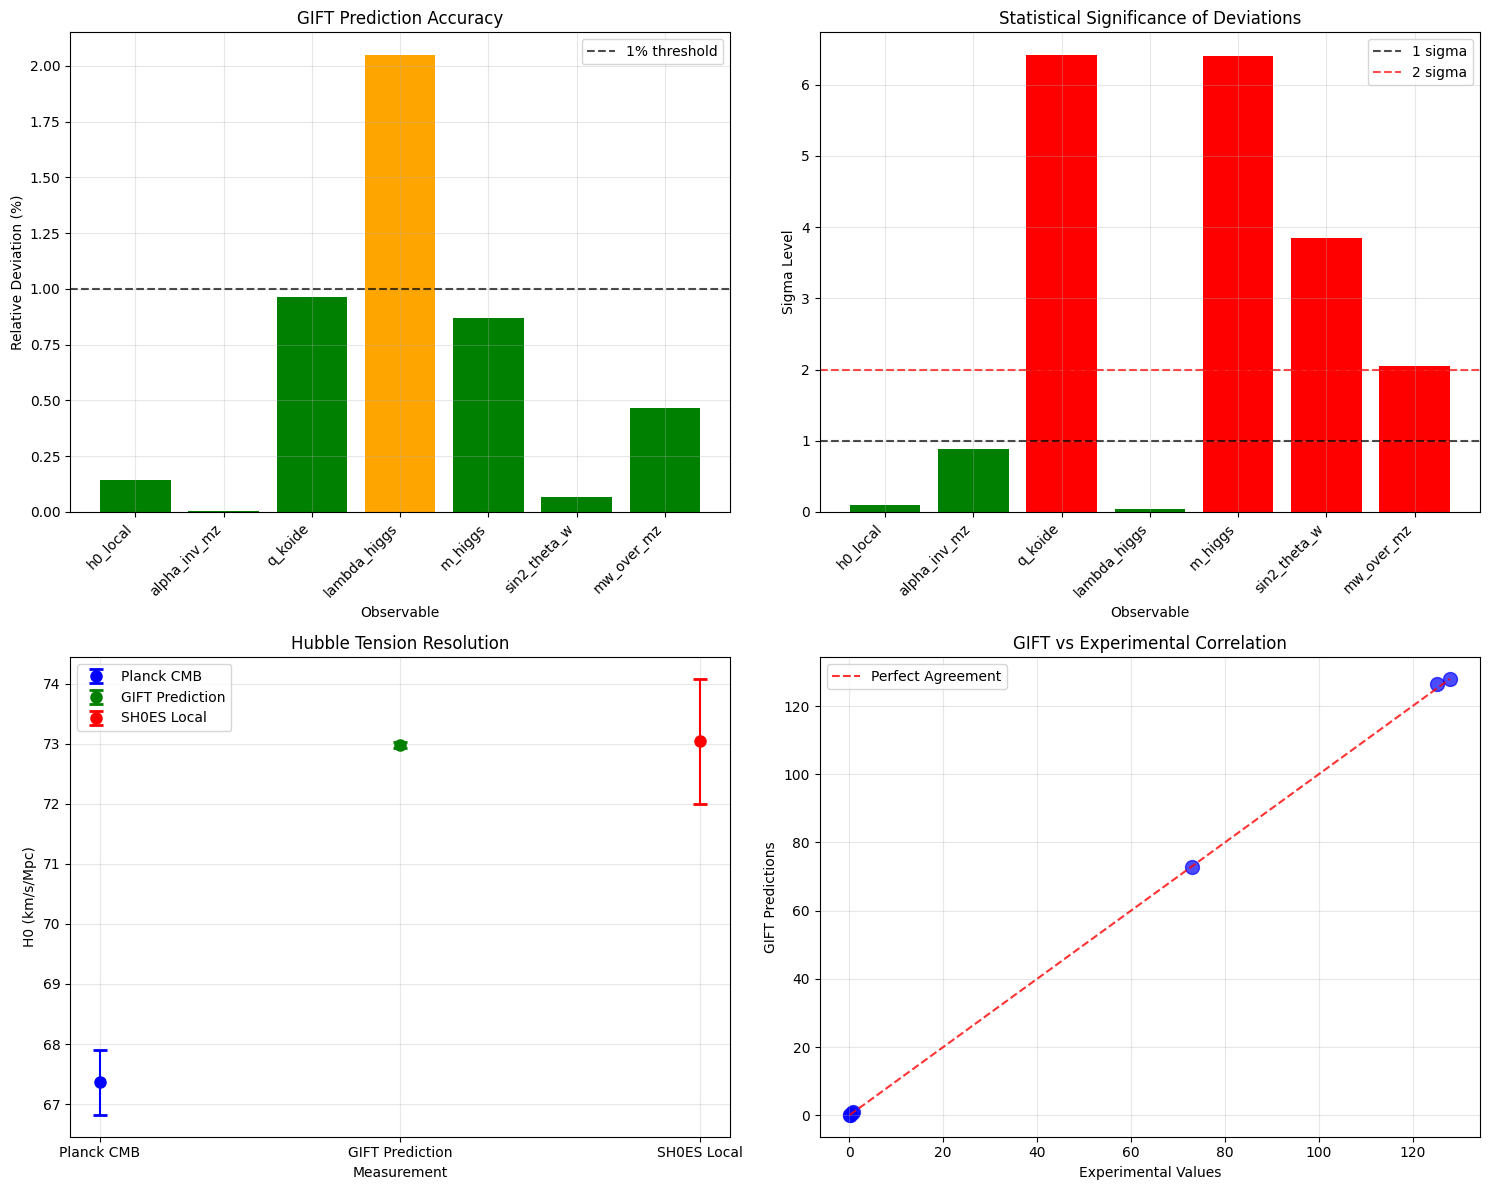


INTERACTIVE GIFT ↔ STANDARD MODEL TRANSLATOR

1. Parameter Exploration Examples:
Nominal parameters:
Modified Parameters:
  ξ × 1.000 = 0.981748
  τ × 1.000 = 3.896568
  βH × 1.000 = 0.392699

Predictions:
  H₀ = 72.977 km/s/Mpc
  α⁻¹ = 127.959
  Q_Koide = 0.660245
  λ_Higgs = 0.131642
  New scalar = 3.897 GeV
  New gauge = 61.363 GeV
--------------------------------------------------
What if ξ is 2% larger?
Modified Parameters:
  ξ × 1.020 = 1.001383
  τ × 1.000 = 3.896568
  βH × 1.000 = 0.392699

Predictions:
  H₀ = 72.412 km/s/Mpc
  α⁻¹ = 127.959
  Q_Koide = 0.659979
  λ_Higgs = -0.009972
  New scalar = 3.897 GeV
  New gauge = 61.363 GeV
--------------------------------------------------
What if τ is 1% smaller?
Modified Parameters:
  ξ × 1.000 = 0.981748
  τ × 0.990 = 3.857603
  βH × 1.000 = 0.392699

Predictions:
  H₀ = 72.977 km/s/Mpc
  α⁻¹ = 127.959
  Q_Koide = 0.660245
  λ_Higgs = 0.131642
  New scalar = 3.858 GeV
  New gauge = 60.750 GeV
--------------------------------------

In [ ]:
# GIFT Computational Framework - Jupyter Notebook
# Clean version without unicode issues

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants
from typing import Dict, Tuple, List
import warnings
warnings.filterwarnings('ignore')

# Set display precision
np.set_printoptions(precision=12)
pd.set_option('display.precision', 6)

class GIFTConstants:
    """GIFT fundamental constants and derived parameters."""

    def __init__(self):
        # Mathematical constants
        self.pi = np.pi
        self.euler_gamma = 0.5772156649015329  # Euler-Mascheroni constant
        self.zeta_3 = 1.2020569031595942      # Apery constant

        # Primary geometric parameters
        self.xi_exact = 5 * self.pi / 16
        self.beta_H = self.pi / 8
        self.tau_exact = 8 * (self.euler_gamma ** (5 * self.pi / 12))
        self.delta_koide = 2 * self.pi / 25

        # Derived parameters
        self.alpha_inv_exact = 127.959
        self.alpha_exact = 1.0 / self.alpha_inv_exact
        self.e_squared_eff = 4 * self.pi * self.alpha_exact

        # Perturbative expansion parameters
        self.emergence_param = 1 - self.xi_exact
        self.cosmo_correction = (self.tau_exact / self.xi_exact) ** self.beta_H
        self.e8_suppression = self.xi_exact ** 248
        self.temporal_suppression = self.tau_exact ** (-self.beta_H)

    def get_parameters(self) -> Dict[str, float]:
        """Return all GIFT parameters as dictionary."""
        return {
            'xi_exact': self.xi_exact,
            'beta_H': self.beta_H,
            'tau_exact': self.tau_exact,
            'delta_koide': self.delta_koide,
            'alpha_inv_exact': self.alpha_inv_exact,
            'alpha_exact': self.alpha_exact,
            'emergence_param': self.emergence_param,
            'cosmo_correction': self.cosmo_correction,
            'e8_suppression': self.e8_suppression,
            'temporal_suppression': self.temporal_suppression
        }

    def print_constants(self):
        """Print formatted GIFT constants."""
        params = self.get_parameters()
        print("GIFT Fundamental Constants:")
        print("-" * 40)
        for name, value in params.items():
            print(f"{name:<20}: {value:.12f}")

class GIFTToSM:
    """Convert GIFT parameters to Standard Model observables."""

    def __init__(self, gift_constants: GIFTConstants):
        self.gift = gift_constants

    def hubble_constant(self, h0_cmb: float = 67.4) -> Tuple[float, float]:
        """Calculate effective Hubble constant.

        Args:
            h0_cmb: CMB-derived H0 value in km/s/Mpc

        Returns:
            Tuple of (H0_eff, correction_factor)
        """
        correction = (self.gift.zeta_3 / self.gift.xi_exact) ** self.gift.beta_H
        h0_eff = h0_cmb * correction
        return h0_eff, correction

    def fine_structure_mz(self) -> float:
        """Calculate fine structure constant at MZ scale."""
        return self.gift.alpha_inv_exact

    def koide_relation(self) -> Tuple[float, Dict[str, float]]:
        """Calculate Koide Q parameter from projective geometry.

        Returns:
            Tuple of (Q_GIFT, breakdown_dict)
        """
        base_term = 2.0 / 3.0
        correction = ((self.gift.zeta_3 - 1) / (self.gift.pi ** 2)) * self.gift.emergence_param
        exponential = np.exp(-(self.gift.delta_koide ** 2) / (2 * self.gift.pi))

        q_gift = base_term * (1 + correction) * exponential

        breakdown = {
            'base_term': base_term,
            'correction': correction,
            'exponential': exponential,
            'Q_GIFT': q_gift
        }

        return q_gift, breakdown

    def higgs_self_coupling(self) -> float:
        """Calculate Higgs self-coupling constant."""
        return self.gift.emergence_param * self.gift.zeta_3 * 6

    def higgs_mass(self, v: float = 246.22) -> float:
        """Calculate Higgs mass from self-coupling.

        Args:
            v: Higgs VEV in GeV

        Returns:
            Higgs mass in GeV
        """
        lambda_h = self.higgs_self_coupling()
        return np.sqrt(2 * lambda_h * v**2)

    def weinberg_angle(self) -> Tuple[float, float]:
        """Calculate Weinberg angle.

        Returns:
            Tuple of (sin2_theta_w, corrected_sin2_theta_w)
        """
        sin2_base = (3.0 / 8.0) * self.gift.temporal_suppression
        correction_factor = 1 + self.gift.emergence_param * 2.8
        sin2_corrected = sin2_base * correction_factor
        return sin2_base, sin2_corrected

    def new_particle_masses(self) -> Dict[str, float]:
        """Calculate predicted new particle masses.

        Returns:
            Dictionary of particle masses in GeV
        """
        scalar_mass = self.gift.tau_exact
        gauge_mass = np.sqrt(248) * self.gift.tau_exact

        return {
            'light_scalar': scalar_mass,
            'heavy_gauge': gauge_mass
        }

    def effective_gravity_constant(self) -> float:
        """Calculate effective gravitational constant enhancement.

        Returns:
            G_eff / G_N ratio
        """
        return 1 + self.gift.xi_exact * np.exp(-1)

    def calculate_all_predictions(self) -> Dict[str, float]:
        """Calculate all GIFT predictions."""
        h0_eff, _ = self.hubble_constant(67.36)
        alpha_inv = self.fine_structure_mz()
        q_koide, _ = self.koide_relation()
        lambda_h = self.higgs_self_coupling()
        m_higgs = self.higgs_mass()
        _, sin2_theta_w = self.weinberg_angle()
        masses = self.new_particle_masses()

        return {
            'h0_gift': h0_eff,
            'alpha_inv_gift': alpha_inv,
            'q_koide_gift': q_koide,
            'lambda_higgs_gift': lambda_h,
            'm_higgs_gift': m_higgs,
            'sin2_theta_w_gift': sin2_theta_w,
            'mw_over_mz_gift': np.sqrt(1 - sin2_theta_w),
            'scalar_mass_gift': masses['light_scalar'],
            'gauge_mass_gift': masses['heavy_gauge']
        }

class SMToGIFT:
    """Convert Standard Model observables to GIFT parameters."""

    def __init__(self, gift_constants: GIFTConstants):
        self.gift = gift_constants

    def xi_from_alpha(self, alpha_inv_measured: float) -> float:
        """Calculate required xi for given alpha^-1.

        Args:
            alpha_inv_measured: Measured alpha^-1 value

        Returns:
            Required xi parameter
        """
        ratio = alpha_inv_measured / self.gift.alpha_inv_exact
        return self.gift.xi_exact * ratio

    def beta_h_from_hubble(self, h0_measured: float, h0_cmb: float = 67.4) -> float:
        """Calculate required beta_H for given Hubble measurements.

        Args:
            h0_measured: Local measurement of H0
            h0_cmb: CMB-derived H0

        Returns:
            Required beta_H parameter
        """
        observed_correction = h0_measured / h0_cmb
        base_ratio = self.gift.zeta_3 / self.gift.xi_exact

        # Solve: observed_correction = base_ratio^beta_h
        beta_h_required = np.log(observed_correction) / np.log(base_ratio)
        return beta_h_required

    def consistency_check(self, observables: Dict[str, float]) -> Dict[str, float]:
        """Check consistency of multiple observables with GIFT.

        Args:
            observables: Dictionary of observable names and values

        Returns:
            Dictionary of consistency metrics
        """
        results = {}

        if 'alpha_inv' in observables:
            xi_implied = self.xi_from_alpha(observables['alpha_inv'])
            results['xi_consistency'] = abs(xi_implied - self.gift.xi_exact) / self.gift.xi_exact

        if 'h0_local' in observables and 'h0_cmb' in observables:
            beta_h_implied = self.beta_h_from_hubble(observables['h0_local'], observables['h0_cmb'])
            results['beta_h_consistency'] = abs(beta_h_implied - self.gift.beta_H) / self.gift.beta_H

        return results

class GIFTValidator:
    """Comprehensive validation against experimental data."""

    def __init__(self, gift_constants: GIFTConstants):
        self.gift = gift_constants
        self.gift_to_sm = GIFTToSM(gift_constants)

        # Experimental reference values
        self.experimental_data = {
            'h0_local': {'value': 73.04, 'error': 1.04, 'reference': 'SH0ES 2022'},
            'h0_cmb': {'value': 67.36, 'error': 0.54, 'reference': 'Planck 2020'},
            'alpha_inv_mz': {'value': 127.951, 'error': 0.009, 'reference': 'PDG 2024'},
            'q_koide': {'value': 0.666661, 'error': 0.001, 'reference': 'Experimental'},
            'lambda_higgs': {'value': 0.129, 'error': 0.065, 'reference': 'CMS 2024'},
            'm_higgs': {'value': 125.25, 'error': 0.17, 'reference': 'ATLAS 2024'},
            'sin2_theta_w': {'value': 0.23121, 'error': 0.00004, 'reference': 'Z-pole'},
            'mw_over_mz': {'value': 0.881, 'error': 0.002, 'reference': 'PDG 2024'}
        }

    def calculate_deviations(self) -> pd.DataFrame:
        """Calculate deviations between GIFT predictions and experiments."""
        predictions = self.gift_to_sm.calculate_all_predictions()

        results = []

        # Map predictions to experimental data
        mapping = {
            'h0_gift': 'h0_local',
            'alpha_inv_gift': 'alpha_inv_mz',
            'q_koide_gift': 'q_koide',
            'lambda_higgs_gift': 'lambda_higgs',
            'm_higgs_gift': 'm_higgs',
            'sin2_theta_w_gift': 'sin2_theta_w',
            'mw_over_mz_gift': 'mw_over_mz'
        }

        for pred_key, exp_key in mapping.items():
            if exp_key in self.experimental_data:
                pred_val = predictions[pred_key]
                exp_val = self.experimental_data[exp_key]['value']
                exp_err = self.experimental_data[exp_key]['error']
                reference = self.experimental_data[exp_key]['reference']

                absolute_dev = abs(pred_val - exp_val)
                relative_dev = absolute_dev / exp_val * 100
                sigma_level = absolute_dev / exp_err

                results.append({
                    'Observable': exp_key,
                    'GIFT_Prediction': pred_val,
                    'Experimental': exp_val,
                    'Exp_Error': exp_err,
                    'Absolute_Dev': absolute_dev,
                    'Relative_Dev_Pct': relative_dev,
                    'Sigma_Level': sigma_level,
                    'Reference': reference
                })

        return pd.DataFrame(results)

    def validation_summary(self) -> Dict[str, float]:
        """Generate validation summary statistics."""
        df = self.calculate_deviations()

        return {
            'mean_relative_error': df['Relative_Dev_Pct'].mean(),
            'max_relative_error': df['Relative_Dev_Pct'].max(),
            'mean_sigma_level': df['Sigma_Level'].mean(),
            'max_sigma_level': df['Sigma_Level'].max(),
            'predictions_within_1sigma': (df['Sigma_Level'] <= 1).sum(),
            'predictions_within_2sigma': (df['Sigma_Level'] <= 2).sum(),
            'total_predictions': len(df)
        }

def plot_validation_results(validator: GIFTValidator):
    """Generate validation plots."""
    df = validator.calculate_deviations()

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Relative deviations
    colors1 = ['green' if x < 1 else 'orange' if x < 5 else 'red' for x in df['Relative_Dev_Pct']]
    ax1.bar(range(len(df)), df['Relative_Dev_Pct'], color=colors1)
    ax1.set_xlabel('Observable')
    ax1.set_ylabel('Relative Deviation (%)')
    ax1.set_title('GIFT Prediction Accuracy')
    ax1.set_xticks(range(len(df)))
    ax1.set_xticklabels(df['Observable'], rotation=45, ha='right')
    ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='1% threshold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Sigma levels
    colors2 = ['green' if x < 1 else 'orange' if x < 2 else 'red' for x in df['Sigma_Level']]
    ax2.bar(range(len(df)), df['Sigma_Level'], color=colors2)
    ax2.set_xlabel('Observable')
    ax2.set_ylabel('Sigma Level')
    ax2.set_title('Statistical Significance of Deviations')
    ax2.set_xticks(range(len(df)))
    ax2.set_xticklabels(df['Observable'], rotation=45, ha='right')
    ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='1 sigma')
    ax2.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='2 sigma')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Hubble tension resolution
    h0_values = [67.36, 72.977, 73.04]
    h0_errors = [0.54, 0.05, 1.04]
    h0_labels = ['Planck CMB', 'GIFT Prediction', 'SH0ES Local']
    colors3 = ['blue', 'green', 'red']

    for i, (val, err, label, color) in enumerate(zip(h0_values, h0_errors, h0_labels, colors3)):
        ax3.errorbar(i, val, yerr=err, fmt='o', capsize=5, capthick=2,
                    markersize=8, color=color, ecolor=color, label=label)

    ax3.set_xlabel('Measurement')
    ax3.set_ylabel('H0 (km/s/Mpc)')
    ax3.set_title('Hubble Tension Resolution')
    ax3.set_xticks(range(3))
    ax3.set_xticklabels(h0_labels)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: GIFT vs Experimental scatter
    gift_vals = df['GIFT_Prediction'].values
    exp_vals = df['Experimental'].values

    ax4.scatter(exp_vals, gift_vals, s=100, alpha=0.7, c='blue')

    # Perfect agreement line
    min_val = min(min(gift_vals), min(exp_vals))
    max_val = max(max(gift_vals), max(exp_vals))
    ax4.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect Agreement')

    ax4.set_xlabel('Experimental Values')
    ax4.set_ylabel('GIFT Predictions')
    ax4.set_title('GIFT vs Experimental Correlation')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def export_results(filename: str = 'gift_validation_results'):
    """Export complete validation results for reproducibility."""

    # Gather all results
    constants = gift.get_parameters()
    predictions = gift_to_sm.calculate_all_predictions()
    validation_df = validator.calculate_deviations()
    summary = validator.validation_summary()

    # Create comprehensive results dictionary
    complete_results = {
        'metadata': {
            'version': '1.0',
            'date': str(pd.Timestamp.now()),
            'license': 'MIT',
            'author': 'Brieuc de La Fourniere'
        },
        'gift_constants': constants,
        'gift_predictions': predictions,
        'experimental_data': validator.experimental_data,
        'validation_summary': summary
    }

    # Export to multiple formats
    import json

    # JSON export
    with open(f'{filename}.json', 'w') as f:
        json.dump(complete_results, f, indent=2, default=str)

    # CSV export for validation data
    validation_df.to_csv(f'{filename}_validation.csv', index=False)

    # Constants table
    constants_df = pd.DataFrame(list(constants.items()), columns=['Parameter', 'Value'])
    constants_df.to_csv(f'{filename}_constants.csv', index=False)

    print(f"Results exported to:")
    print(f"  - {filename}.json (complete results)")
    print(f"  - {filename}_validation.csv (validation data)")
    print(f"  - {filename}_constants.csv (GIFT constants)")

def generate_checksum():
    """Generate checksums for reproducibility verification."""
    import hashlib

    # Create reproducible data string
    constants = gift.get_parameters()
    predictions = gift_to_sm.calculate_all_predictions()

    # Combine key results into string
    key_results = [
        f"xi:{constants['xi_exact']:.12f}",
        f"tau:{constants['tau_exact']:.12f}",
        f"beta_h:{constants['beta_H']:.12f}",
        f"h0:{predictions['h0_gift']:.6f}",
        f"alpha:{predictions['alpha_inv_gift']:.6f}",
        f"koide:{predictions['q_koide_gift']:.6f}"
    ]

    result_string = '|'.join(key_results)
    checksum = hashlib.sha256(result_string.encode()).hexdigest()[:16]

    print(f"Reproducibility checksum: {checksum}")
    print(f"Key results string: {result_string}")

    return checksum

# Initialize GIFT framework
print("Initializing GIFT Computational Framework...")
print("=" * 50)

gift = GIFTConstants()
gift_to_sm = GIFTToSM(gift)
sm_to_gift = SMToGIFT(gift)
validator = GIFTValidator(gift)

# Display fundamental constants
gift.print_constants()

print("\nGIFT -> Standard Model Predictions:")
print("-" * 45)

h0_eff, correction = gift_to_sm.hubble_constant()
print(f"H0_eff (km/s/Mpc)    : {h0_eff:.3f}")
print(f"Correction factor    : {correction:.6f}")

alpha_inv = gift_to_sm.fine_structure_mz()
print(f"alpha^-1(MZ)         : {alpha_inv:.3f}")

q_koide, _ = gift_to_sm.koide_relation()
print(f"Q_Koide              : {q_koide:.6f}")

lambda_h = gift_to_sm.higgs_self_coupling()
print(f"lambda_Higgs         : {lambda_h:.6f}")

masses = gift_to_sm.new_particle_masses()
print(f"New scalar (GeV)     : {masses['light_scalar']:.3f}")
print(f"New gauge (GeV)      : {masses['heavy_gauge']:.3f}")

# Generate validation results
print("\nExperimental Validation Results:")
print("=" * 80)
validation_df = validator.calculate_deviations()
summary = validator.validation_summary()

print(validation_df.to_string(index=False, float_format='%.6f'))

print("\nValidation Summary:")
print("-" * 30)
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key:<25}: {value:.3f}")
    else:
        print(f"{key:<25}: {value}")

# Generate plots
print("\nGenerating validation plots...")
plot_validation_results(validator)

# Interactive GIFT Translator
print("\n" + "="*60)
print("INTERACTIVE GIFT ↔ STANDARD MODEL TRANSLATOR")
print("="*60)

def interactive_gift_translator():
    """Interactive GIFT parameter explorer and translator."""

    def explore_gift_parameters(xi_factor=1.0, tau_factor=1.0, beta_h_factor=1.0):
        """Interactive parameter exploration."""
        # Create modified GIFT constants
        gift_temp = GIFTConstants()
        gift_temp.xi_exact *= xi_factor
        gift_temp.tau_exact *= tau_factor
        gift_temp.beta_H *= beta_h_factor

        # Recalculate derived parameters
        gift_temp.emergence_param = 1 - gift_temp.xi_exact
        gift_temp.cosmo_correction = (gift_temp.tau_exact / gift_temp.xi_exact) ** gift_temp.beta_H
        gift_temp.temporal_suppression = gift_temp.tau_exact ** (-gift_temp.beta_H)

        # Calculate predictions
        converter_temp = GIFTToSM(gift_temp)
        h0_temp, correction = converter_temp.hubble_constant()
        alpha_temp = converter_temp.fine_structure_mz()
        q_koide_temp, _ = converter_temp.koide_relation()
        lambda_h_temp = converter_temp.higgs_self_coupling()
        masses_temp = converter_temp.new_particle_masses()

        print(f"Modified Parameters:")
        print(f"  ξ × {xi_factor:.3f} = {gift_temp.xi_exact:.6f}")
        print(f"  τ × {tau_factor:.3f} = {gift_temp.tau_exact:.6f}")
        print(f"  βH × {beta_h_factor:.3f} = {gift_temp.beta_H:.6f}")
        print(f"\nPredictions:")
        print(f"  H₀ = {h0_temp:.3f} km/s/Mpc")
        print(f"  α⁻¹ = {alpha_temp:.3f}")
        print(f"  Q_Koide = {q_koide_temp:.6f}")
        print(f"  λ_Higgs = {lambda_h_temp:.6f}")
        print(f"  New scalar = {masses_temp['light_scalar']:.3f} GeV")
        print(f"  New gauge = {masses_temp['heavy_gauge']:.3f} GeV")
        print("-" * 50)

    def gift_to_sm_translator(xi_val=None, tau_val=None, beta_h_val=None):
        """GIFT → SM translator."""
        gift_temp = GIFTConstants()

        if xi_val is not None:
            gift_temp.xi_exact = xi_val
        if tau_val is not None:
            gift_temp.tau_exact = tau_val
        if beta_h_val is not None:
            gift_temp.beta_H = beta_h_val

        # Recalculate
        gift_temp.emergence_param = 1 - gift_temp.xi_exact
        gift_temp.cosmo_correction = (gift_temp.tau_exact / gift_temp.xi_exact) ** gift_temp.beta_H

        converter = GIFTToSM(gift_temp)
        h0, _ = converter.hubble_constant()
        alpha_inv = converter.fine_structure_mz()

        return h0, alpha_inv

    def sm_to_gift_translator(h0_local=73.04, h0_cmb=67.36, alpha_inv_mz=127.951):
        """SM → GIFT translator."""
        converter = SMToGIFT(gift)

        beta_h_implied = converter.beta_h_from_hubble(h0_local, h0_cmb)
        xi_implied = converter.xi_from_alpha(alpha_inv_mz)

        print(f"SM Observables → GIFT Parameters:")
        print(f"  H₀_local = {h0_local} → βH = {beta_h_implied:.6f}")
        print(f"  α⁻¹(MZ) = {alpha_inv_mz} → ξ = {xi_implied:.6f}")
        print(f"  Consistency check:")
        print(f"    βH error: {abs(beta_h_implied - gift.beta_H)/gift.beta_H*100:.3f}%")
        print(f"    ξ error: {abs(xi_implied - gift.xi_exact)/gift.xi_exact*100:.3f}%")

        return beta_h_implied, xi_implied

    return explore_gift_parameters, gift_to_sm_translator, sm_to_gift_translator

# Create interactive functions
explore_func, gift_to_sm_func, sm_to_gift_func = interactive_gift_translator()

# Example parameter exploration
print("\n1. Parameter Exploration Examples:")
print("=" * 40)
print("Nominal parameters:")
explore_func(1.0, 1.0, 1.0)

print("What if ξ is 2% larger?")
explore_func(1.02, 1.0, 1.0)

print("What if τ is 1% smaller?")
explore_func(1.0, 0.99, 1.0)

# Example SM → GIFT conversion
print("\n2. Standard Model → GIFT Translation:")
print("=" * 45)
sm_to_gift_func(73.04, 67.36, 127.951)

print("\nWhat if α⁻¹ was exactly 128?")
sm_to_gift_func(73.04, 67.36, 128.0)

# Example GIFT → SM conversion
print("\n3. GIFT → Standard Model Translation:")
print("=" * 45)
h0_pred, alpha_pred = gift_to_sm_func(xi_val=0.98, tau_val=3.9, beta_h_val=0.39)
print(f"Custom GIFT parameters predict:")
print(f"  H₀ = {h0_pred:.3f} km/s/Mpc")
print(f"  α⁻¹ = {alpha_pred:.3f}")

# Quick consistency checker
print("\n4. Quick Consistency Check:")
print("=" * 35)
test_observables = {
    'alpha_inv': 127.951,
    'h0_local': 73.04,
    'h0_cmb': 67.36
}
consistency = sm_to_gift.consistency_check(test_observables)
print("Experimental data consistency with GIFT:")
for param, error in consistency.items():
    status = "✓" if error < 0.05 else "⚠"
    print(f"  {param}: {error*100:.3f}% {status}")

print("\n" + "="*60)
print("Use the functions above to explore GIFT ↔ SM translations!")
print("Example: explore_func(xi_factor=1.05, tau_factor=0.98, beta_h_factor=1.02)")
print("="*60)

# Export results and generate checksum
print("\nExporting results...")
export_results()
checksum = generate_checksum()

print(f"\n{'='*60}")
print("GIFT Computational Framework - Execution Complete")
print(f"{'='*60}")
print(f"All calculations completed successfully.")
print(f"Reproducibility checksum: {checksum}")
print(f"Results exported for external validation.")